# Application of Digital Signal Processing in Biomedical Signal Processing: ECG, EEG, EMG Analysis

In [10]:
# Required Libraries

#!pip install wfdb biosppy neurokit2

In [12]:
#!pip install --upgrade FuzzyTM neurokit2 wfdb biosppy

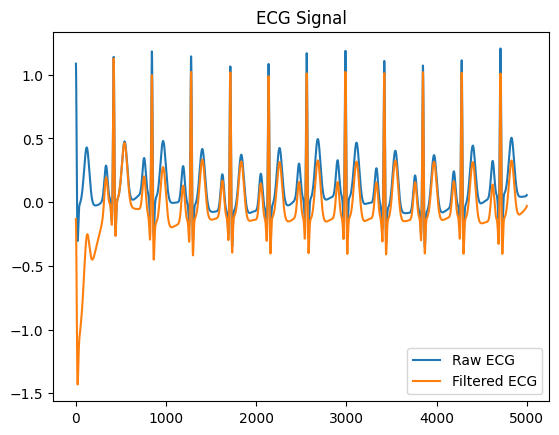

In [20]:
# Loading and Filtering ECG Signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# Simulate ECG
ecg = nk.ecg_simulate(duration=10, sampling_rate=500)
fs = 500  # Sampling rate

# Bandpass filter design
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.5, 40, fs)

# Plotting
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal")
plt.legend()
plt.show()

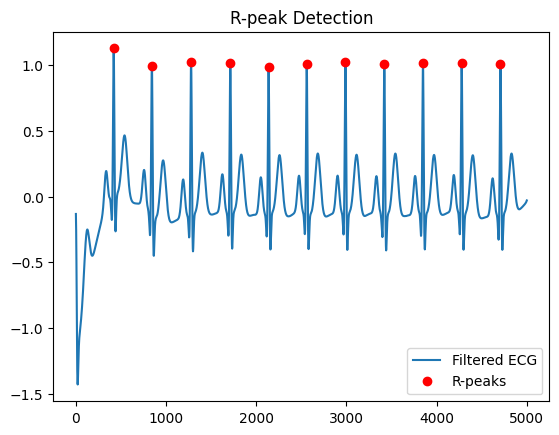

In [22]:
# R-peak Detection

signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()

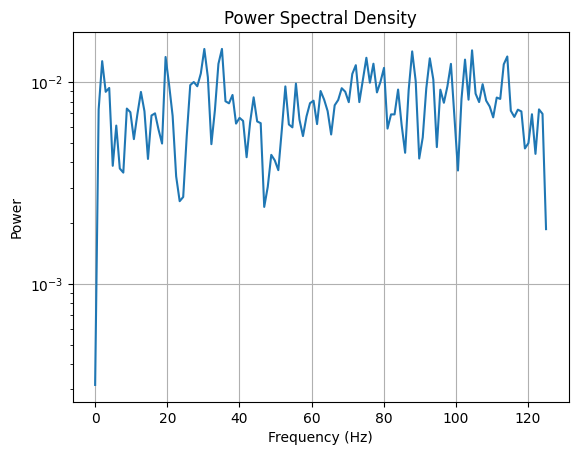

In [14]:
# Spectral Analysis of EEG or EMG (Optional)

from scipy.signal import welch

# Simulate random EEG
np.random.seed(0)
eeg = np.random.randn(1024)
f, Pxx = welch(eeg, fs=250)

plt.semilogy(f, Pxx)
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid(True)
plt.show()